<a href="https://colab.research.google.com/github/MrPrabhathPeri/Youtube-Comments-Spam-Detector/blob/main/youtube_comments_spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Cell 2: Loading the dataset
df = pd.read_csv('/content/Youtube-Spam-Dataset.csv')  # Adjust the path as needed

# Display the first few rows
df.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [6]:
# Cell 3: Data cleaning and preprocessing
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

df['cleaned_content'] = df['CONTENT'].apply(clean_text)
df.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,cleaned_content
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,huh anyway check youtube channel kobyoshi
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,hey guys check new channel first vid us monkey...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,test say murdevcom
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,shaking sexy ass channel enjoy _
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,watchvvtarggvgtwq check


In [7]:
# Cell 4: Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_content']).toarray()

# Labels
y = df['CLASS']  # Assuming 'CLASS' is 1 for spam and 0 for not spam

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Cell 5: Training a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.87


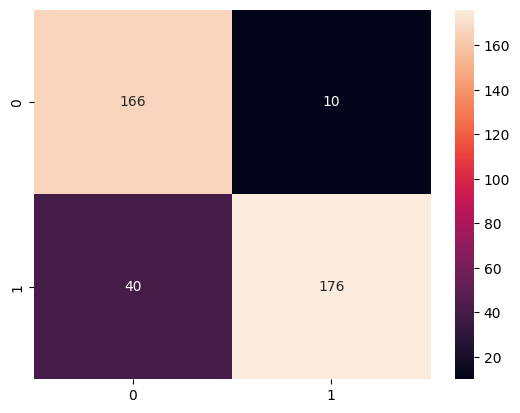

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       176
           1       0.95      0.81      0.88       216

    accuracy                           0.87       392
   macro avg       0.88      0.88      0.87       392
weighted avg       0.88      0.87      0.87       392



In [9]:
# Cell 6: Evaluating the model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [10]:
# Cell 7: Predicting new comments
new_comments = ["This is a spam comment!", "Great video, thanks!"]
new_comments_cleaned = [clean_text(comment) for comment in new_comments]
new_comments_vectorized = vectorizer.transform(new_comments_cleaned).toarray()

predictions = model.predict(new_comments_vectorized)
for comment, pred in zip(new_comments, predictions):
    print(f'Comment: {comment} - Prediction: {"Spam" if pred == 1 else "Not Spam"}')


Comment: This is a spam comment! - Prediction: Spam
Comment: Great video, thanks! - Prediction: Spam


In [12]:
# Cell 8: Saving the model
import pickle

with open('/content/spam_detector_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer as well
with open('/content/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [13]:
# Cell 9: Loading the saved model and vectorizer
import pickle

# Load the model
with open('/content/spam_detector_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the vectorizer
with open('/content/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)


In [14]:
# Cell 10: Predicting new comments using the loaded model
new_comments = ["This is a spam comment!", "Amazing content, keep it up!", "Click here to win a free iPhone!"]
new_comments_cleaned = [clean_text(comment) for comment in new_comments]  # Clean the input comments
new_comments_vectorized = loaded_vectorizer.transform(new_comments_cleaned).toarray()  # Vectorize the input comments

# Predict using the loaded model
predictions = loaded_model.predict(new_comments_vectorized)

# Display the results
for comment, pred in zip(new_comments, predictions):
    print(f'Comment: "{comment}" - Prediction: {"Spam" if pred == 1 else "Not Spam"}')


Comment: "This is a spam comment!" - Prediction: Spam
Comment: "Amazing content, keep it up!" - Prediction: Not Spam
Comment: "Click here to win a free iPhone!" - Prediction: Spam
